<a href="https://colab.research.google.com/github/Kvillalobos210/Repos/blob/master/BruteForce_Algoritmo_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# Esto tiene formato de código
```

** Brute Force**

## Crear grafo

In [1]:
import graphviz as gv
import numpy as np
import pandas as pd
import heapq as hq
import math

In [2]:
! git clone https://github.com/AugustoMorante/wv72_tf_201912909_201912150_201919040_201913741_201910702.git

Cloning into 'wv72_tf_201912909_201912150_201919040_201913741_201910702'...
remote: Enumerating objects: 449, done.
remote: Counting objects: 100% (449/449), done.
remote: Compressing objects: 100% (436/436), done.
remote: Total 449 (delta 247), reused 47 (delta 8), pack-reused 0
Receiving objects: 100% (449/449), 7.91 MiB | 15.33 MiB/s, done.
Resolving deltas: 100% (247/247), done.


In [3]:
def readAdjl(fn, haslabels=False, weighted=False, sep="|"):
  with open(fn) as f:
    labels = None
    if haslabels:
      labels = f.readline().strip().split()
    L = []
    for line in f:
      if weighted:
        L.append([tuple(map(int, p.split(sep))) for p in line.strip().split()])
        # line => "1|3 2|5 4|4" ==> [(1, 3), (2, 5), (4, 4)]
      else: 
        L.append(list(map(int, line.strip().split()))) # "1 3 5" => [1, 3, 5]
        # L.append([int(x) for x in line.strip().split()])
  return L, labels

def adjlShow(L, labels=None, directed=False, weighted=False, path=[],
             layout="sfdp"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.edge_attr["color"] = "gray"
  g.node_attr["color"] = "orangered"
  g.node_attr["width"] = "0.1"
  g.node_attr["height"] = "0.1"
  g.node_attr["fontsize"] = "8"
  g.node_attr["fontcolor"] = "mediumslateblue"
  g.node_attr["fontname"] = "monospace"
  g.edge_attr["fontsize"] = "8"
  g.edge_attr["fontname"] = "monospace"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  for v, u in enumerate(path):
    if u != None:
      if weighted:
        for vi, w in G[u]:
          if vi == v:
            break
        g.edge(str(u), str(v), str(w), dir="forward", penwidth="2", color="orange")
      else:
        g.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g

In [4]:
def conversor(x, y, n): ##Ingresar coordenada X, Y y el numero de nodos en cada lado (ejemplo el nodo que nos piden es de 1000x1000 es decir ingresa 1000 como 'n')
  r = x*n + y
  return r

In [5]:
GR, _ = readAdjl("wv72_tf_201912909_201912150_201919040_201913741_201910702/Presentación Final/Archivos/grafo-complejidad.txt", weighted=True) ##Cuando quiera leer de otro archivo .txt cambia el nombre de "1.txt" x el de tu archivo
##for i, edges in enumerate(G):
  ##print(f"{i:2}: {edges}")
##adjlShow(G, weighted=True)

In [6]:
import csv

In [7]:
almacenes = [] ##Arreglo de almacenes [Nombre del almacen, Nodo en el q se encuentra]
with open("wv72_tf_201912909_201912150_201919040_201913741_201910702/Presentación Final/Archivos/almacenes.csv", newline="") as csvfile:
    reader = csv.reader(csvfile, delimiter=",")
    for row in reader:
      if row[0] != 'Almacenes':
        row[1] = conversor(int(row[1]),int(row[2]), 1000) 
        row.pop(2)
        almacenes.append(row)  
    print(almacenes)

[['Basil', 780755], ['Coleman', 17503], ['Red Cloud', 381488], ['Dunning', 79919], ['Susan', 816708], ['Wayridge', 684631], ['Schiller', 423738], ['Clove', 11402], ['Oneill', 324313], ['Oakridge', 722738], ['Crowley', 645660], ['Rusk', 848642], ['2nd', 442459], ['Lakewood', 305636], ['Lotheville', 225713], ['Arizona', 412081], ['Graceland', 634756], ['Elka', 94466], ['Cordelia', 578436], ['Dwight', 39525], ['Artisan', 991414], ['Prairie Rose', 444917], ['Gateway', 947611], ['Riverside', 561749], ['Elka', 405213], ['Tennyson', 16423], ['Buena Vista', 561653], ['Larry', 40559], ['Beilfuss', 104291], ['Independence', 723996], ['Declaration', 449617], ['7th', 420877], ['Dexter', 855123], ['Debs', 153476], ['Logan', 729076], ['Carey', 499795], ['Holmberg', 128357], ['Blackbird', 113953], ['Longview', 673156], ['Ridgeway', 738423], ['Macpherson', 650167], ['Mariners Cove', 917072], ['Dapin', 895137], ['Darwin', 491564], ['Fremont', 67383], ['Cardinal', 410695], ['Loeprich', 793409], ['Northp

In [8]:
puntosEntrega = [] ##Arreglo de puntos de entrega [Nombre del punto, Nodo en el q se encuentra]
with open("wv72_tf_201912909_201912150_201919040_201913741_201910702/Presentación Final/Archivos/puntos_entrega.csv", newline="") as csvfile:
    reader = csv.reader(csvfile, delimiter=",")
    for row in reader:
      if row[0] != 'Puntos de Entrega':
        row[1] = conversor(int(row[1]),int(row[2]), 1000) 
        row.pop(2)
        puntosEntrega.append(row)  
    print(puntosEntrega)

[['92420 Katie Trail', 718534], ['70903 Spenser Way', 199938], ['760 3rd Hill', 193080], ['1409 Maple Wood Parkway', 184525], ['491 Browning Alley', 599354], ['6 Moose Place', 755144], ['08 Merchant Way', 304606], ['28633 Vernon Crossing', 334814], ['29053 Spohn Park', 64906], ['147 Commercial Road', 273560], ['114 Monument Park', 951151], ['316 Bayside Center', 391840], ['0314 Warbler Lane', 392069], ['75588 Mcguire Avenue', 539482], ['8 Harbort Lane', 963267], ['8886 Truax Place', 376438], ['77 Lukken Terrace', 883557], ['94299 Hovde Trail', 255641], ['23 Cascade Terrace', 74913], ['16 Mandrake Place', 587677], ['9247 Hayes Crossing', 487103], ['3100 Milwaukee Terrace', 263452], ['2 Harper Center', 10988], ['456 Park Meadow Trail', 560360], ['7106 Union Point', 645350], ['387 Meadow Ridge Parkway', 607456], ['2 Farwell Avenue', 599090], ['172 Sutherland Lane', 990007], ['67672 Ridgeview Alley', 632377], ['1306 Monument Lane', 350942], ['0 Green Ridge Point', 274530], ['947 3rd Crossi

#BFS

In [30]:
def bruteforce(G, s):
  n = len(G)
  tvisit = [None, s]
  path = []
  visited = [False]*n
  while(tvisit):
    v = tvisit.pop()
    if v : 
      path.append(v)
      if len(path) == n:
        break
      visited[v]
      for x in G[v]:
        tvisit.append(None)
        tvisit.append(x) 
  return path

Algoritmo BFS punto a punto

In [31]:
def bfPointToPoint(G,s,t):
  n = len(G)
  tvisit = [None, s]
  path = []
  visited = [False]*n
  while(tvisit):
    v = tvisit.pop()
    if v : 
      path.append(v)
      if len(path) == n:
        break
      visited[v]
      for x in G[v]:
        tvisit.append(None)
        tvisit.append(x) 
  return path, path[t]

In [32]:
def showInfoBFS(G, source, target):
  path,_ = bfsPointToPoint(G, source, target)
  t = target
  targetPath = []
  targetPath.append(target)
  targetPath.append(path[t])
  while path[t] != source:
    t = path[t]
    targetPath.append(path[t])

  truePath = path
  for i in range(len(truePath)):
    if i not in targetPath and i != target:
      truePath[i] = None 

  return targetPath, truePath, len(targetPath)-1

#Prueba con grafo de 100 nodos

In [33]:
def crearGrafoVersion1(n):
  t = [[] for i in range(n**2)]
  for i in range(n**2):
    if i == 0:
      t[i].append([i,i+1])
      t[i].append([i,i+n])
    elif i in range(1,n-1):
      t[i].append([i,i-1])
      t[i].append([i,i+1])
      t[i].append([i,i+n])
    elif i == n-1:
      t[i].append([i,i-1])
      t[i].append([i,i+n])
    elif i%n == 0 and i != 0 and i != n*(n-1):
      t[i].append([i,i+1])
      t[i].append([i,i+n])
      t[i].append([i,i-n])
    elif (i+1)%n == 0 and i != n-1 and i != (n**2)-1:
      t[i].append([i,i-1])
      t[i].append([i,i+n])
      t[i].append([i,i-n])
    elif i == n*(n-1):
      t[i].append([i,i+1])
      t[i].append([i,i-n])
    elif i in range(n*(n-1)+1,(n**2)-1):
      t[i].append([i,i-1])
      t[i].append([i,i+1])
      t[i].append([i,i-n])
    elif i == (n**2)-1:
      t[i].append([i,i-1])
      t[i].append([i,i-n])
    else:
      t[i].append([i,i-1])
      t[i].append([i,i+1])
      t[i].append([i,i+n])
      t[i].append([i,i-n])

  return t

In [34]:
t = crearGrafoVersion1(10)

In [35]:
fichero = open("1.txt", 'w')
for i in range(len(t)):
    for j in range(len(t[i])):
      fichero.write(str(t[i][j][1]) + '|1' + " ")
    fichero.write('\n')
fichero.close()

 0: [(1, 1), (10, 1)]
 1: [(0, 1), (2, 1), (11, 1)]
 2: [(1, 1), (3, 1), (12, 1)]
 3: [(2, 1), (4, 1), (13, 1)]
 4: [(3, 1), (5, 1), (14, 1)]
 5: [(4, 1), (6, 1), (15, 1)]
 6: [(5, 1), (7, 1), (16, 1)]
 7: [(6, 1), (8, 1), (17, 1)]
 8: [(7, 1), (9, 1), (18, 1)]
 9: [(8, 1), (19, 1)]
10: [(11, 1), (20, 1), (0, 1)]
11: [(10, 1), (12, 1), (21, 1), (1, 1)]
12: [(11, 1), (13, 1), (22, 1), (2, 1)]
13: [(12, 1), (14, 1), (23, 1), (3, 1)]
14: [(13, 1), (15, 1), (24, 1), (4, 1)]
15: [(14, 1), (16, 1), (25, 1), (5, 1)]
16: [(15, 1), (17, 1), (26, 1), (6, 1)]
17: [(16, 1), (18, 1), (27, 1), (7, 1)]
18: [(17, 1), (19, 1), (28, 1), (8, 1)]
19: [(18, 1), (29, 1), (9, 1)]
20: [(21, 1), (30, 1), (10, 1)]
21: [(20, 1), (22, 1), (31, 1), (11, 1)]
22: [(21, 1), (23, 1), (32, 1), (12, 1)]
23: [(22, 1), (24, 1), (33, 1), (13, 1)]
24: [(23, 1), (25, 1), (34, 1), (14, 1)]
25: [(24, 1), (26, 1), (35, 1), (15, 1)]
26: [(25, 1), (27, 1), (36, 1), (16, 1)]
27: [(26, 1), (28, 1), (37, 1), (17, 1)]
28: [(27, 1), (

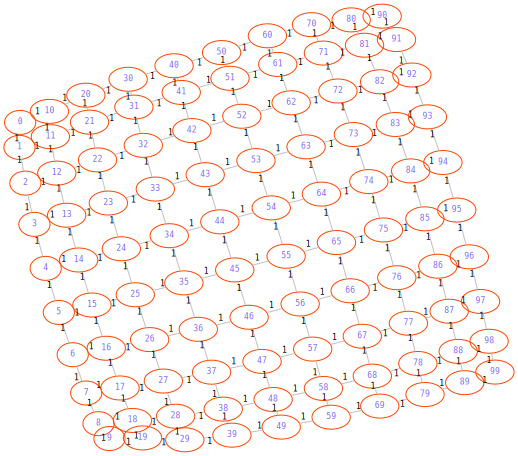

In [36]:
G, _ = readAdjl("1.txt", weighted=True) ##Cuando quiera leer de otro archivo .txt cambia el nombre de "1.txt" x el de tu archivo
for i, edges in enumerate(G):
  print(f"{i:2}: {edges}")
adjlShow(G, weighted=True)

In [37]:
def quitarPeso(G):
  L = []
  PL = []
  for i, edges in enumerate(G):
    for j in edges:
      PL.append(j[0])
    L.append(PL)
    PL = []
  return L

In [38]:
GC = quitarPeso(G)

In [46]:
bfPath = bruteforce(GC,0)
print(bfsPath)

[None, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]


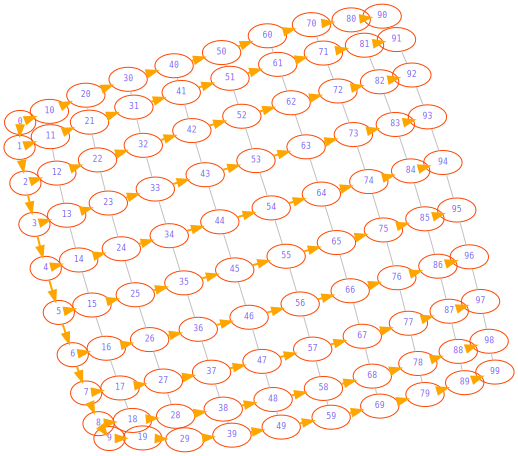

In [47]:
adjlShow(GC, path=bfsPath)

[95, 85, 75, 65, 55, 45, 35, 36, 37, 38, 39]
10


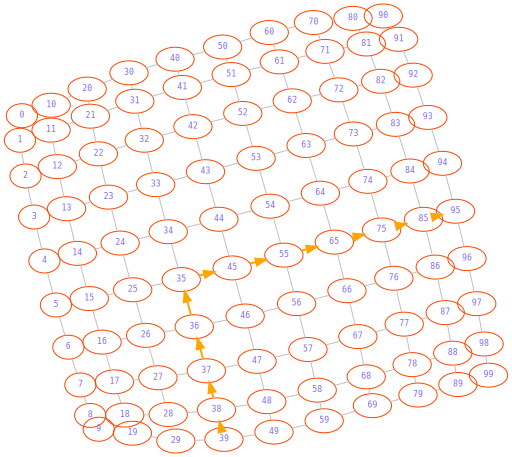

In [48]:
path, tPath, aristas = showInfoBFS(GC, 39, 95)
print(path)
print(aristas)
adjlShow(GC,path=tPath)

#Con el grafo trabajado

In [49]:
def BFPointToPointEdges(G, source, target):
  path,_ = bfsPointToPoint(G, source, target)
  t = target
  targetPath = []
  targetPath.append(target)
  targetPath.append(path[t])
  while path[t] != source:
    t = path[t]
    targetPath.append(path[t])
  return len(targetPath)-1

In [50]:
almacenes2 = [] ##Arreglo de almacenes [Nombre del almacen, posicion X, posicion Y]
with open("wv72_tf_201912909_201912150_201919040_201913741_201910702/Presentación Final/Archivos/almacenes.csv", newline="") as csvfile:
    reader = csv.reader(csvfile, delimiter=",")
    for row in reader:
      if row[0] != 'Almacenes':
        almacenes2.append(row)  
    print(almacenes2)

[['Basil', '780', '755'], ['Coleman', '17', '503'], ['Red Cloud', '381', '488'], ['Dunning', '79', '919'], ['Susan', '816', '708'], ['Wayridge', '684', '631'], ['Schiller', '423', '738'], ['Clove', '11', '402'], ['Oneill', '324', '313'], ['Oakridge', '722', '738'], ['Crowley', '645', '660'], ['Rusk', '848', '642'], ['2nd', '442', '459'], ['Lakewood', '305', '636'], ['Lotheville', '225', '713'], ['Arizona', '412', '81'], ['Graceland', '634', '756'], ['Elka', '94', '466'], ['Cordelia', '578', '436'], ['Dwight', '39', '525'], ['Artisan', '991', '414'], ['Prairie Rose', '444', '917'], ['Gateway', '947', '611'], ['Riverside', '561', '749'], ['Elka', '405', '213'], ['Tennyson', '16', '423'], ['Buena Vista', '561', '653'], ['Larry', '40', '559'], ['Beilfuss', '104', '291'], ['Independence', '723', '996'], ['Declaration', '449', '617'], ['7th', '420', '877'], ['Dexter', '855', '123'], ['Debs', '153', '476'], ['Logan', '729', '76'], ['Carey', '499', '795'], ['Holmberg', '128', '357'], ['Blackbi

In [51]:
puntosEntrega2 = [] ##Arreglo de puntos de entrega [Nombre del punto, posicion X, posicion Y]
with open("wv72_tf_201912909_201912150_201919040_201913741_201910702/Presentación Final/Archivos/puntos_entrega.csv", newline="") as csvfile:
    reader = csv.reader(csvfile, delimiter=",")
    for row in reader:
      if row[0] != 'Puntos de Entrega':
        puntosEntrega2.append(row)  
    print(puntosEntrega2)

[['92420 Katie Trail', '718', '534'], ['70903 Spenser Way', '199', '938'], ['760 3rd Hill', '193', '80'], ['1409 Maple Wood Parkway', '184', '525'], ['491 Browning Alley', '599', '354'], ['6 Moose Place', '755', '144'], ['08 Merchant Way', '304', '606'], ['28633 Vernon Crossing', '334', '814'], ['29053 Spohn Park', '64', '906'], ['147 Commercial Road', '273', '560'], ['114 Monument Park', '951', '151'], ['316 Bayside Center', '391', '840'], ['0314 Warbler Lane', '392', '69'], ['75588 Mcguire Avenue', '539', '482'], ['8 Harbort Lane', '963', '267'], ['8886 Truax Place', '376', '438'], ['77 Lukken Terrace', '883', '557'], ['94299 Hovde Trail', '255', '641'], ['23 Cascade Terrace', '74', '913'], ['16 Mandrake Place', '587', '677'], ['9247 Hayes Crossing', '487', '103'], ['3100 Milwaukee Terrace', '263', '452'], ['2 Harper Center', '10', '988'], ['456 Park Meadow Trail', '560', '360'], ['7106 Union Point', '645', '350'], ['387 Meadow Ridge Parkway', '607', '456'], ['2 Farwell Avenue', '599

In [52]:
def dist(a,b):
  _, x1, y1 = a
  _, x2, y2 = b
  return abs(int(x1) - int(x2)) + abs(int(y1) - int(y2))

In [55]:
group = [-1] * len(puntosEntrega2)

for i in range(len(puntosEntrega2)):
  m = 0
  d = dist(puntosEntrega2[i], puntosEntrega2[len(puntosEntrega2)-1])
  for j in range(len(almacenes2)):
    d2 = dist(puntosEntrega2[i], almacenes2[j])
    if d2 < d:
      d = d2
      m = j
  group[i] = m

In [54]:
group = np.array(group)

cant = []
for i in range(len(almacenes)):
  cant.append(len(group[group == i]))

print(min(cant))
print(max(cant))
print(np.mean(cant))

2
185
60.0


In [56]:
GRC = quitarPeso(GR)

GRUPOS

In [57]:
#GRUPO 31
group[group == 31]
distancias_almacen_punto_entrega_BFS = []
for i in range(len(puntosEntrega)):
  if group[i] == 31: 
    camino = BFSPointToPointEdges(GRC, almacenes[31][1], puntosEntrega[i][1])
    distancias_almacen_punto_entrega_BFS.append(camino)
print(distancias_almacen_punto_entrega_BFS)

[149, 66, 106, 105, 131, 95, 90, 92, 97, 48, 84, 92, 88, 70, 114, 44, 46, 133, 14, 46, 103, 98, 126, 153, 40, 149, 153, 63, 17, 123, 86, 78, 47, 147, 68, 131, 31, 122, 19, 62, 16, 105, 91, 17, 43, 123, 27, 50, 37, 95, 36, 60]


In [58]:
#GRUPO 32
group[group == 32]
distancias_almacen_punto_entrega_BFS = []
for i in range(len(puntosEntrega)):
  if group[i] == 32: 
    camino = BFSPointToPointEdges(GRC, almacenes[32][1], puntosEntrega[i][1])
    distancias_almacen_punto_entrega_BFS.append(camino)
print(distancias_almacen_punto_entrega_BFS)

[137, 105, 79, 127, 131, 70, 97, 97, 91, 49, 90, 21, 170, 32, 9, 88, 166, 63, 81, 115, 62, 175, 39, 103, 114, 103, 74, 155, 161, 131, 158, 107, 62, 117, 107, 146, 138, 153, 46, 127, 62, 145, 94, 95, 75, 174, 27, 35, 85, 71, 138, 80, 18, 106, 101, 68, 2]


In [ ]:
#GRUPO 33
group[group == 33]
distancias_almacen_punto_entrega_BFS = []
for i in range(len(puntosEntrega)):
  if group[i] == 33: 
    camino = BFSPointToPointEdges(GRC, almacenes[33][1], puntosEntrega[i][1])
    distancias_almacen_punto_entrega_BFS.append(camino)
print(distancias_almacen_punto_entrega_BFS)

[31, 108, 55, 137, 127, 90, 94, 60, 9, 72, 32, 104, 46, 103, 25, 126, 70, 114, 63, 38, 64, 22, 138, 46, 47, 78, 73, 141, 113, 40, 90, 90, 64, 64, 33, 34, 80, 40, 78, 30, 70, 8, 70, 108, 55, 29, 59, 67, 85, 150, 61, 39, 90, 85, 39, 59, 122, 79]


In [59]:
#GRUPO 34
group[group == 34]
distancias_almacen_punto_entrega_BFS = []
for i in range(len(puntosEntrega)):
  if group[i] == 34: 
    camino = BFSPointToPointEdges(GRC, almacenes[34][1], puntosEntrega[i][1])
    distancias_almacen_punto_entrega_BFS.append(camino)
print(distancias_almacen_punto_entrega_BFS)

[94, 109, 197, 116, 111, 94, 58, 133, 77, 127, 18, 109, 143, 34, 49, 154, 59, 102, 118, 152, 27, 196, 35, 166, 39, 54, 56, 153, 110, 95, 145, 101, 52, 115, 78, 51, 90, 144, 99, 92, 55, 68, 19, 132, 66, 53, 166, 33, 116, 63, 35, 81, 52, 80, 167, 94, 66, 139, 122, 23, 52, 42, 62, 109, 77, 38, 58, 41, 126, 55, 207]


In [ ]:
#GRUPO 35
group[group == 35]
distancias_almacen_punto_entrega_BFS = []
for i in range(len(puntosEntrega)):
  if group[i] == 35: 
    camino = BFSPointToPointEdges(GRC, almacenes[35][1], puntosEntrega[i][1])
    distancias_almacen_punto_entrega_BFS.append(camino)
print(distancias_almacen_punto_entrega_BFS)

[220, 32, 13, 103, 161, 63, 111, 53, 94, 105, 196, 182, 108, 53, 74, 216, 112, 60, 27, 84, 196, 82, 208, 190, 149, 104, 148, 50, 314, 124, 86, 127, 223, 51, 94, 75, 62, 160, 207, 149, 184, 89, 118, 111, 323, 141, 264, 57, 153, 150, 187, 160, 238, 188, 241, 200, 241, 94, 69, 180, 65, 83, 200, 172, 43, 99, 234, 90, 204, 57, 220, 59, 144, 145, 109, 228, 182, 89, 148, 21, 99, 89, 314, 256, 211, 79, 263, 208, 216, 246, 54, 71, 223, 69, 129, 222, 187, 154, 182, 300, 123, 261, 155, 171, 133, 171, 67, 75, 105, 117, 221, 86, 68, 97, 136, 194, 172, 92, 109, 126, 89, 282, 43, 142, 250, 13, 104, 134, 262, 175, 178, 249, 51, 209, 83, 176, 193, 101, 31, 204, 122, 50, 189, 116, 214, 123, 235, 40, 121, 211, 99, 226, 73, 164, 107, 134, 156, 116, 244]


In [60]:
#GRUPO 36
group[group == 36]
distancias_almacen_punto_entrega_BFS = []
for i in range(len(puntosEntrega)):
  if group[i] == 36: 
    camino = BFSPointToPointEdges(GRC, almacenes[36][1], puntosEntrega[i][1])
    distancias_almacen_punto_entrega_BFS.append(camino)
print(distancias_almacen_punto_entrega_BFS)

[112, 8, 107, 23, 125, 23, 128, 7, 77, 100, 93, 89, 11, 84, 130, 86, 5, 50, 109, 51, 54, 116, 24, 25, 48, 12, 51, 48, 36, 53, 24, 112, 98, 25, 21, 52, 58, 51, 57, 62, 70, 41, 25, 121]


In [61]:
#GRUPO 37
group[group == 37]
distancias_almacen_punto_entrega_BFS = []
for i in range(len(puntosEntrega)):
  if group[i] == 37: 
    camino = BFSPointToPointEdges(GRC, almacenes[37][1], puntosEntrega[i][1])
    distancias_almacen_punto_entrega_BFS.append(camino)
print(distancias_almacen_punto_entrega_BFS)

[20, 39, 86, 36, 63, 43, 113, 48, 22, 59, 43, 99, 15, 29, 42, 50, 40, 54, 57, 81, 63]


In [62]:
#GRUPO 38
group[group == 38]
distancias_almacen_punto_entrega_BFS = []
for i in range(len(puntosEntrega)):
  if group[i] == 38: 
    camino = BFSPointToPointEdges(GRC, almacenes[38][1], puntosEntrega[i][1])
    distancias_almacen_punto_entrega_BFS.append(camino)
print(distancias_almacen_punto_entrega_BFS)

[79, 75, 42, 102, 141, 63, 47, 66, 62, 130, 170, 116, 136, 146, 96, 126, 79, 62, 107, 68, 131, 43, 137, 86, 69, 145, 38, 115, 23, 35, 107, 135, 46, 137, 126, 122, 132, 147, 59, 153, 77, 112, 72, 81, 45, 113, 126, 115, 155, 81, 117, 52, 75, 69, 119, 49, 93, 67, 104, 29, 53, 67, 107, 96, 181, 138, 57, 40, 100]


In [63]:
#GRUPO 39
group[group == 39]
distancias_almacen_punto_entrega_BFS = []
for i in range(len(puntosEntrega)):
  if group[i] == 39: 
    camino = BFSPointToPointEdges(GRC, almacenes[39][1], puntosEntrega[i][1])
    distancias_almacen_punto_entrega_BFS.append(camino)
print(distancias_almacen_punto_entrega_BFS)

[74, 85, 26, 59, 144, 109, 52, 74, 96, 72, 74, 84, 131, 57, 173, 82, 83, 23, 66, 139, 104, 118, 45, 76, 39, 29, 148, 79, 108, 20, 83, 62, 107, 149, 97, 92, 51, 92, 88, 90, 116, 134, 67, 116, 89, 95, 174, 27, 111, 25, 73, 69, 130, 78, 148, 81, 145, 85, 165, 79, 124, 54, 66, 72, 133, 20, 47, 118, 94, 118, 65, 109, 130, 78, 79, 90, 70, 61, 57, 81, 137, 48, 102, 114, 69, 85, 58, 65, 111]


In [64]:
#GRUPO 40
group[group == 40]
distancias_almacen_punto_entrega_BFS = []
for i in range(len(puntosEntrega)):
  if group[i] == 40: 
    camino = BFSPointToPointEdges(GRC, almacenes[40][1], puntosEntrega[i][1])
    distancias_almacen_punto_entrega_BFS.append(camino)
print(distancias_almacen_punto_entrega_BFS)

[128, 158, 106, 99, 128, 102, 84, 162, 121, 139, 141, 145, 150, 110, 86, 122, 30, 90, 86, 124, 148, 101, 157, 96, 136, 105, 98, 106, 150, 76, 149, 53, 63, 38, 5, 98, 178, 49, 127, 132, 111, 106, 145, 83, 83, 141, 110, 77, 128, 94, 21, 57, 120, 92, 166, 76, 91, 91, 99, 107, 160, 74, 81]
